<a href="https://colab.research.google.com/github/Bhavya-Agrawal/Py_Projects/blob/master/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset from Kaggle + Unzip the folders

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavyaagrawal","key":"36ad1e7259b5f3cdabb7691ddaffb0fa"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 92% 257M/281M [00:06<00:00, 41.9MB/s]
100% 281M/281M [00:06<00:00, 44.9MB/s]


In [ ]:
from zipfile import ZipFile
isl = "/content/indian-sign-language-isl.zip"
with ZipFile(isl,'r') as zip:
  zip.extractall();
  print("Dataset uploaded successfully !!!")

Dataset uploaded successfully !!!


# **Collecting the dataset**


### **Fetching all images**

In [ ]:
from glob import glob

In [ ]:
images = glob('/content/Indian/*/*.jpg', recursive=True)

In [ ]:
images[42000]

'/content/Indian/Z/195.jpg'

### **Fetching Images and corresponsing Labels**

In [ ]:
unique_labels = []

total_images = []
folder_labels = []
images = glob('/content/Indian/*/*.jpg', recursive=True)

for image in images:
  total_images.append(image)

  label = image.split('/')[-2]
  folder_labels.append(label)

  if label not in unique_labels:
    unique_labels.append(label)

In [ ]:
numerical_folder_labels=[]
for label in folder_labels:
  # print(type(label))
  # print(label)
  numerical_folder_labels.append(unique_labels.index(label))



print(numerical_folder_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(folder_labels))
print(len(total_images))
print(len(unique_labels))
print(len(unique_labels))

42745
42745
35
35


# Train-Test Split

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/Indian', 
                   output = 'ISL',
                   seed = 22, ratio = (.7,.2,.1))

Copying files: 42745 files [00:05, 7854.62 files/s]


In [ ]:
# converting RGB to grayscale images and storing the result in the same folder structure
import cv2
from skimage import io
import os
import shutil
main_folder = '/content/ISL/train'
for image_folder in os.listdir(main_folder):
  internal_folder = os.path.join(main_folder, image_folder)
  for image in os.listdir(internal_folder):
    image_path = os.path.join(internal_folder, image)

    # read image
    frame = cv2.imread(image_path)  

    # convert image to grayscale     
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # apply gaussian blur to the image
    blur = cv2.GaussianBlur(gray,(5,5),2)
    
    # apply boundary to the actual character in the image
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

    ret, res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # replace the existing colored image with above filtered image in the same location    
    if os.path.exists(image_path):
      os.remove(image_path)
    cv2.imwrite(image_path, res)


## Data Augmentation

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data augmentation step
training_data_generator = ImageDataGenerator(rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             validation_split=0.2)

test_data_generation = ImageDataGenerator(rescale=1/255)

In [ ]:


train_generator = training_data_generator.flow_from_directory('/content/ISL/train', 
                                                               target_size=(150, 150), 
                                                               batch_size=20,
                                                               class_mode='binary')

validation_generator = training_data_generator.flow_from_directory('/content/ISL/val',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')
test_generator = test_data_generation.flow_from_directory('/content/ISL/test',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

Found 29919 images belonging to 35 classes.
Found 8547 images belonging to 35 classes.
Found 4279 images belonging to 35 classes.


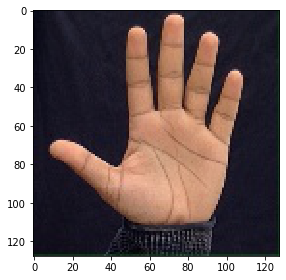

In [ ]:
io.imshow('/content/ISL/val/5/0.jpg')

# Visualising the images

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),2)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
rm = cv2.imread('/content/Indian/A/10.jpg')

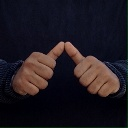

In [ ]:
cv2_imshow(rm)

In [ ]:
train_images,train_labels = train_generator.next()

print(len(train_images))
for i in range(0,5):
    image = train_images[i]
    print(train_images[i])
    imshow(image)

# **Creating Model & Training the model**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from time import time

In [ ]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(35))
model.add(Activation('sigmoid'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 150)     4200      
                                                                 
 activation_18 (Activation)  (None, 148, 148, 150)     0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 200)       270200    
                                                                 
 activation_19 (Activation)  (None, 72, 72, 200)       0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 200)      0         
 g2D)                                                 

In [ ]:
r = model.fit_generator(
        train_generator,
        #steps_per_epoch=18631 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        #validation_steps=10119 // batch_size
        )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1496/1496 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8673

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1496/1496 [==============================] - 251s 168ms/step - loss: 0.4390 - accuracy: 0.8673 - val_loss: 0.1227 - val_accuracy: 0.9605
Epoch 2/20
1496/1496 [==============================] - 248s 166ms/step - loss: 0.1198 - accuracy: 0.9643 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 3/20
1496/1496 [==============================] - 248s 166ms/step - loss: 0.0819 - accuracy: 0.9759 - val_loss: 0.0511 - val_accuracy: 0.9827
Epoch 4/20
1496/1496 [==============================] - 245s 164ms/step - loss: 0.0716 - accuracy: 0.9799 - val_loss: 0.0608 - val_accuracy: 0.9792
Epoch 5/20
1496/1496 [==============================] - 245s 164ms/step - loss: 0.0484 - accuracy: 0.9870 - val_loss: 0.0873 - val_accuracy: 0.9760
Epoch 6/20
1496/1496 [==============================] - 245s 164ms/step - loss: 0.0420 - accuracy: 0.9882 - val_loss: 0.0190 - val_accuracy: 0.9933
Epoch 7/20
1496/1496 [==============================] - 245s 164ms/step - loss: 0.0568 - accuracy: 0.9852 - val_loss: 0.013

# Prediction for a single image

In [1]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Indian/8/1001.jpg', target_size = (50,50))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


FileNotFoundError: ignored

In [ ]:
type(test_image)

numpy.ndarray

In [ ]:
classes = train_generator.class_indices

NameError: ignored

In [ ]:
classes

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [ ]:
# get the index pf maximum value out of numpy array ie result
max_value_index = numpy.where(result == numpy.amax(result))
shape_of_arr = result.shape
columns = shape_of_arr[1]
# total values ie (max value's row * columns) + (row number it has parsed) + (1 as its zero indexing, so on checking it can be skipped)
index_of_max_value = (max_value_index[0][0] * columns) + max_value_index[1][0] +1

In [ ]:
class_key = list(classes.keys())
class_values = list(classes.values())
# get the index of maximum value from keys
class_key[class_key.index(class_values.get(max_value_index))]

TypeError: ignored

#### Taking input images from webcam